# In this code I will calculate the PS of the cmb map obtained by cls made by CAMB

In [231]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [232]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))

In [233]:
sys.path.insert(0,camb_path)

In [234]:
import camb
from camb import model, initialpower, correlations

Set a new parameters for CAMB
I use the parameters 68% intervals for base $\Lambda CDM$ model for Planck power spectra, and combination with CMB lensing reconstruction and BAO. It can be found in arXiv:1807.06209

In [288]:
pars=camb.CAMBparams()
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, mnu=0.06, omk=0.001, tau=0.0561)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

Calculate results for this parameters

In [289]:
results = camb.get_results(pars)

In [290]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


Plot the total lensed CMB power spectra 

In [291]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])

(2551, 4)


Shape of $\ell $ array

In [292]:
ls = np.arange(totCL.shape[0])
print(ls.shape)
print(ls)
print(totCL.shape[0])

(2551,)
[   0    1    2 ... 2548 2549 2550]
2551


Text(0.5, 1.0, 'PS of the cmb by camb with Planck 2018 parameters')

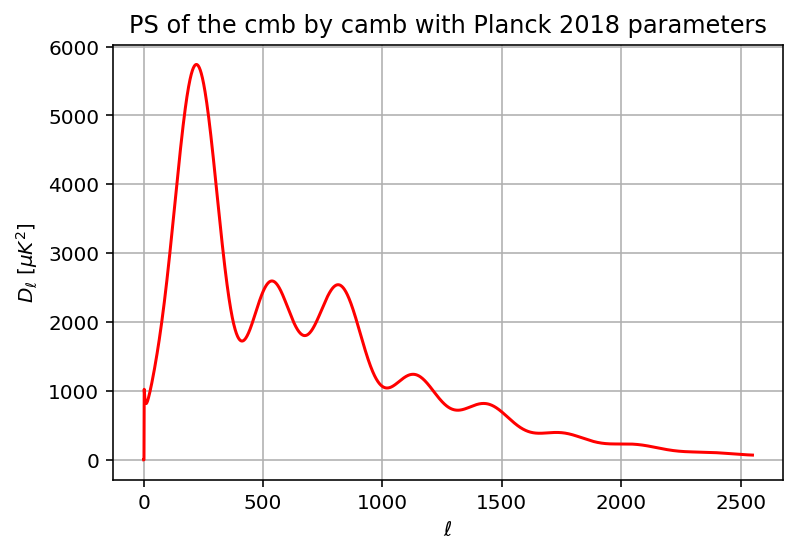

In [293]:
#plt.plot(ls, unlensedCL[:,0], color = 'y')
plt.plot(ls, totCL[:,0], color = 'r')

plt.xlabel('$\ell$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.grid()
plt.title('PS of the cmb by camb with Planck 2018 parameters')

We make the zero matrix with len 100

In [14]:
import healpy as hp

Resolution nside = 2048


First map

In [22]:
lmax = 2500
nside=2048
mapa_cl_1 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_2 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_3 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_4 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))


In [16]:
mapa_cl_5 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_6 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_7 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_8 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_9 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_10 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))


In [43]:
lmax = 2500
cl1=hp.anafast(mapa_cl_1, lmax=lmax)
cl2=hp.anafast(mapa_cl_2, lmax=lmax)
cl3=hp.anafast(mapa_cl_3, lmax=lmax)
cl4=hp.anafast(mapa_cl_4, lmax=lmax)
cl5=hp.anafast(mapa_cl_5, lmax=lmax)
cl6=hp.anafast(mapa_cl_6, lmax=lmax)
cl7=hp.anafast(mapa_cl_7, lmax=lmax)
cl8=hp.anafast(mapa_cl_8, lmax=lmax)
cl9=hp.anafast(mapa_cl_9, lmax=lmax)
cl10=hp.anafast(mapa_cl_10, lmax=lmax)

We make the array with the size required

In [67]:
cl1_ = np.ones((len(cl1),4))
cl2_ =np.ones((len(cl2),4))
cl3_ = np.ones((len(cl3),4))
cl4_ =np.ones((len(cl4),4))
cl5_ = np.ones((len(cl5),4))
cl6_ =np.ones((len(cl6),4))
cl7_ = np.ones((len(cl7),4))
cl8_ =np.ones((len(cl8),4))
cl9_ = np.ones((len(cl9),4))
cl10_ =np.ones((len(cl10),4))
cl1_[:,0] = cl1
cl2_[:,0] = cl2
cl3_[:,0] = cl3
cl4_[:,0] = cl4
cl5_[:,0] = cl5
cl6_[:,0] = cl6
cl7_[:,0] = cl7
cl8_[:,0] = cl8
cl9_[:,0] = cl9




print(cl1_.shape)
print(cl1_)

(2501, 4)
[[1.59199017e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.63762126e-15 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.12323273e+03 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 ...
 [7.41928987e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [7.08148487e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [7.24265628e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]


In [18]:
from camb import correlations

In [202]:
theta=np.linspace(0.1, np.pi, 1535)
x=np.cos(theta)
c_theta_1=camb.correlations.cl2corr(cl1_, x, lmax=2500)
c_theta_2=camb.correlations.cl2corr(cl2_, x, lmax=2500)
c_theta_3=camb.correlations.cl2corr(cl3_, x, lmax=2500)
c_theta_4=camb.correlations.cl2corr(cl4_, x, lmax=2500)
c_theta_5=camb.correlations.cl2corr(cl5_, x, lmax=2500)
c_theta_6=camb.correlations.cl2corr(cl6_, x, lmax=2500)
c_theta_7=camb.correlations.cl2corr(cl7_, x, lmax=2500)
c_theta_8=camb.correlations.cl2corr(cl8_, x, lmax=2500)
c_theta_9=camb.correlations.cl2corr(cl9_, x, lmax=2500)
c_theta_10=camb.correlations.cl2corr(cl10_, x, lmax=2500)


/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb/correlations.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  fac = fac1 / fac2
/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb/correlations.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  d22 = (((4 * x - 8) / fac2 + lfacs) * P
/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb/correlations.py:89: RuntimeWarning: invalid value encountered in add
  d22 = (((4 * x - 8) / fac2 + lfacs) * P


plot the results

Text(0, 0.5, '$C(\\theta)~[\\mu K^2]$')

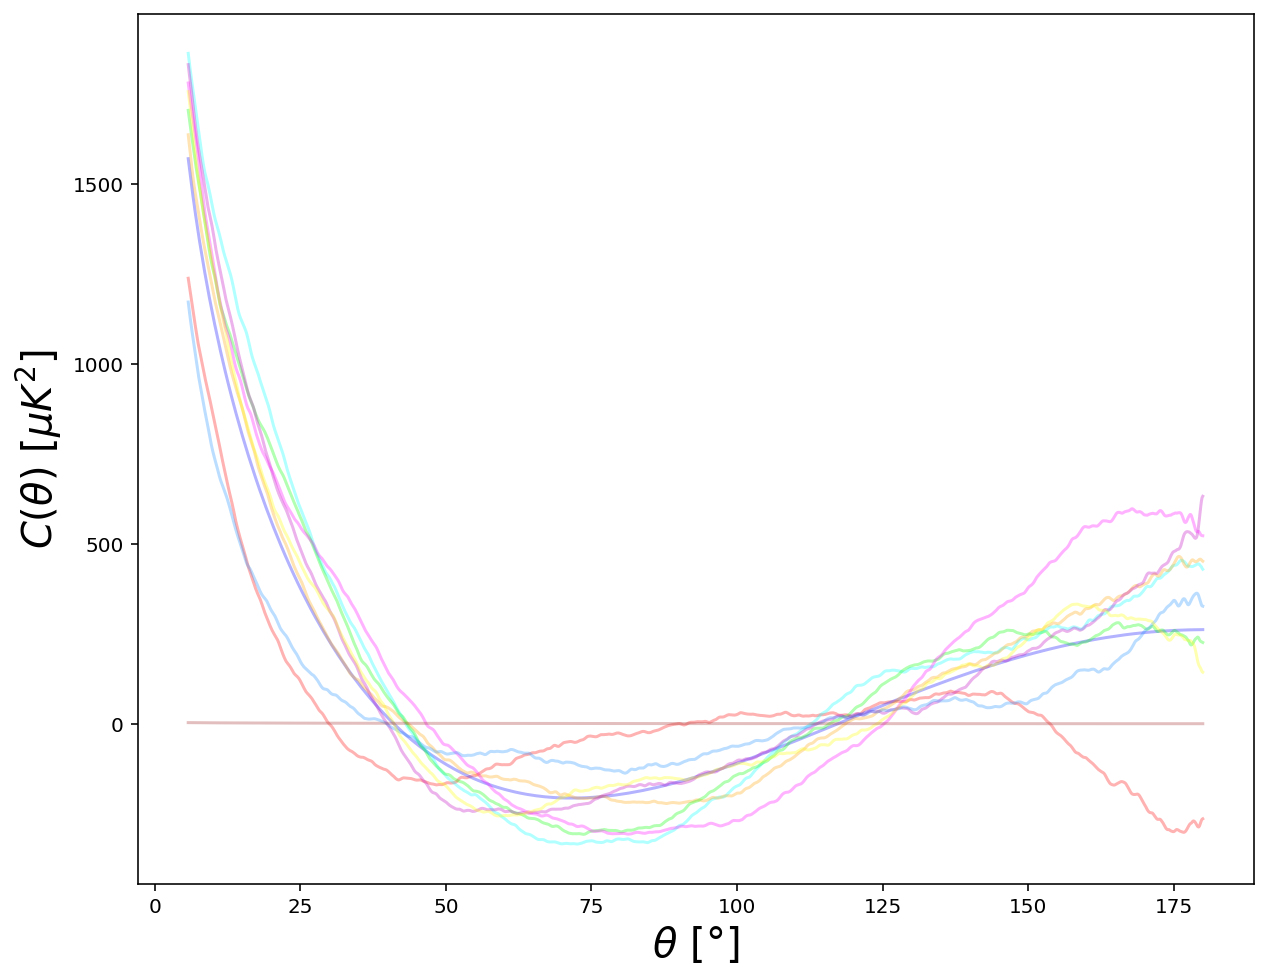

In [312]:
plt.figure(figsize=(10,8))
plt.plot(theta*180/np.pi, c_theta_1[:,0], alpha=0.3, color='r', label='$C_1(\theta)$ 1st cls')
plt.plot(theta*180/np.pi, c_theta_2[:,0], alpha=0.3, color='b', label='$C_2(\theta)$ 2nd cls')
plt.plot(theta*180/np.pi, c_theta_3[:,0], alpha=0.3, color='cyan', label='$C_3(\theta)$ 3rd cls')
plt.plot(theta*180/np.pi, c_theta_4[:,0], alpha=0.3, color='orange', label='$C_4(\theta)$ 4th cls')
plt.plot(theta*180/np.pi, c_theta_5[:,0], alpha=0.3, color='lime', label='$C_5(\theta)$ 5th cls')
plt.plot(theta*180/np.pi, c_theta_6[:,0], alpha=0.3, color='m', label='$C_6(\theta)$ 6th cls')
plt.plot(theta*180/np.pi, c_theta_7[:,0], alpha=0.3, color='magenta', label='$C_7(\theta)$ 7th cls')
plt.plot(theta*180/np.pi, c_theta_8[:,0],  alpha=0.3, color='dodgerblue', label='$C_8(\theta)$ 8th cls')
plt.plot(theta*180/np.pi, c_theta_9[:,0],  alpha=0.3,color='yellow', label='$C_9(\theta)$ 9th cls')
plt.plot(theta*180/np.pi, c_theta_10[:,0], alpha=0.3,color='brown', label='$C_10(\theta)$ 10th cls')
#plt.errorbar(theta*180/np.pi, media, yerr=sigma, color='navy',label='$\sigma')
plt.xlabel(r'$\theta~[¬∞]$',fontsize=20)
plt.ylabel(r'$C(\theta)~[\mu K^2]$',fontsize=20)






In [309]:
c_theta=np.array([c_theta_1[:,0],c_theta_2[:,0],c_theta_3[:,0], c_theta_4[:,0], c_theta_5[:,0], c_theta_6[:,0], c_theta_7[:,0], c_theta_8[:,0], c_theta_9[:,0],c_theta_10[:,0]])

In [310]:
c_theta.shape

(10, 1535)

In [311]:
sigma = np.std(c_theta,axis=0)
media = np.mean(c_theta,axis=0)

In [314]:
sigma.shape

(1535,)

In [313]:
theta.size

1535

<ErrorbarContainer object of 3 artists>

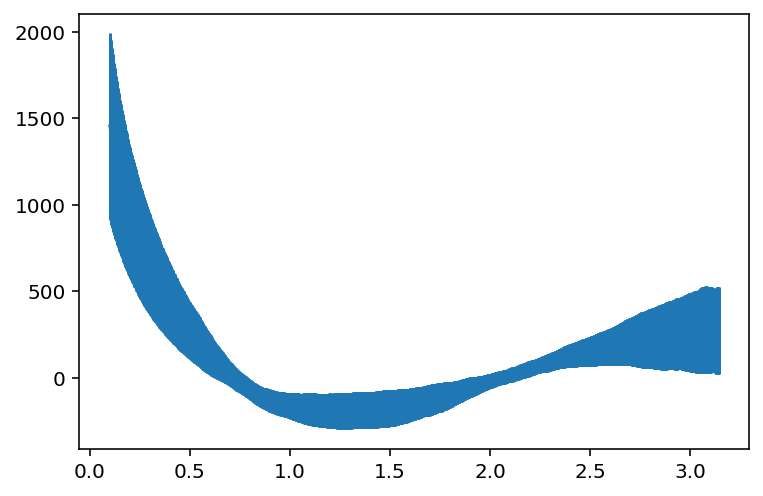

In [316]:
plt.errorbar(theta,media, yerr=sigma)

In [65]:
c_theta_1.shape
print(c_theta_1[:,0])

[1683.17742326 1484.94769359 1332.59297023 1163.15798443 1024.63865125
  913.85228335  802.2850358   700.95179697  597.40017616  522.36464
  441.11372435  369.08517104  295.04090554  240.54429694  193.50102283
  140.40759567   92.68311131   55.4166219    24.26047678   -4.06835735
  -30.49872336  -54.50887643  -62.79658974  -77.08210963 -102.09127178
 -109.81573386 -108.58819452 -112.51788069 -128.45983156 -136.59855936
 -147.31407045 -161.64467931 -172.40203461 -186.83638918 -194.37279228
 -202.92668239 -209.62674702 -215.22198864 -206.85169984 -202.2313096
 -198.20751833 -190.4978546  -190.72150085 -186.55088662 -175.37336771
 -171.73690639 -160.71478553 -151.39120948 -140.16694975 -125.77249472
 -113.50141197 -106.16720987 -102.94021141 -100.03761505 -106.83344804
 -108.86162592 -108.54811473 -102.95950843  -98.31605735  -90.9835991
  -93.27626359  -91.45096569  -83.52442507  -88.28058924  -85.69029225
  -74.57674807  -58.34361741  -37.7556955   -24.5966011    -2.47096526
   18.76684

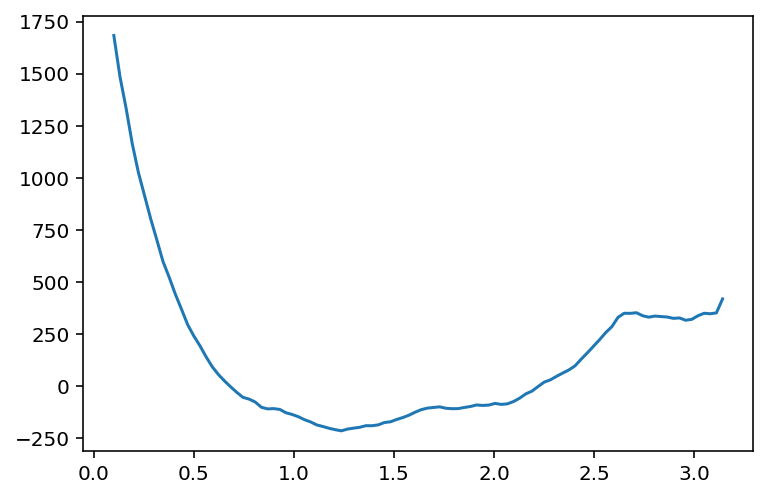

In [66]:
plt.plot(theta,c_theta_1[:,0])

We compute the cls with the healpy routine anafast and we plot the results, so we compare the spectrum with camb

In [34]:
lmax = 2500
cl=hp.anafast(mapa_cl_smoothed, lmax=lmax)
ell=np.arange(len(cl))
l = np.arange(len(cl))

We are going to compare all different power spectrum

In [38]:
lmax= 2500
cl_2=hp.anafast(mapa_cl_smoothed_2, lmax=lmax)
l_2=np.arange(len(cl_2))

In [35]:
print(cl)
print(ell)
print(cl.shape)

[2.07465638e-10 3.59468703e-11 2.44209209e+02 ... 6.70913229e-01
 6.66617985e-01 6.44655959e-01]
[   0    1    2 ... 2498 2499 2500]
(2501,)


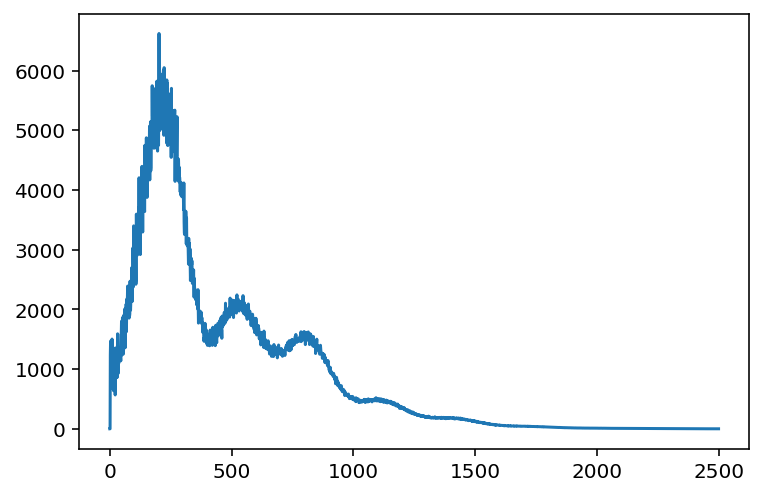

In [22]:
plt.plot(ell, cl)

Reading the documentation of the Planck smica release we see that the output has a resolution of 10 minutes.Therefore as a first order correction of the beam, then we can divide the power spectrum by  the  gauss beam window function.
I compute the spherical transform of a aximmetric gaussian beam with hp.gauss_beam


In [294]:
Bl=hp.gauss_beam(fwhm = np.radians(10.0/60.0), lmax=lmax)
Cl_gauss = cl/Bl
print(Bl)


NameError: name 'cl' is not defined

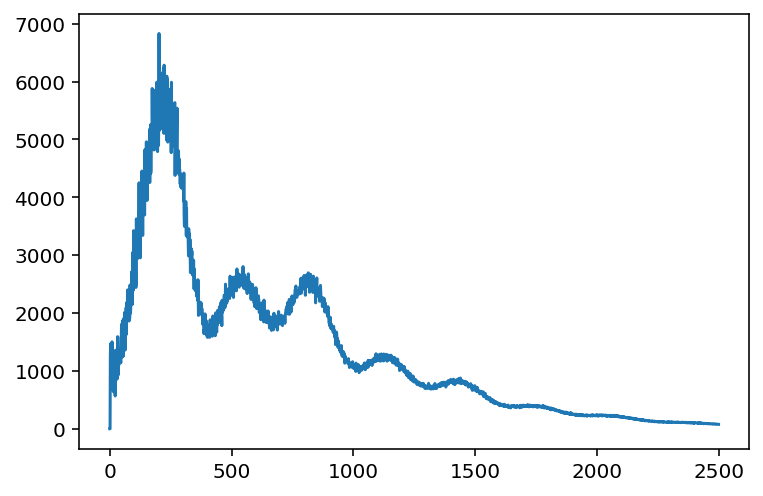

In [24]:
plt.plot(ell, Cl_gauss)


I am going to binned the results following $\Delta l = 5$ for $0 \ \leq  l \ \leq 99$ obtained of Planck 2018 results

In [25]:
# We define a function to bin the ls
# It depends of the ell, Cl_gauss, sums
def binsdata(ell,Cl_gauss, sums):
# We define the bines
    bins=int(len(ell)/sums)
# Python counst from 0
# we made four arrays to equal to 0

    cln=np.zeros(bins-1) 
    ln=np.zeros(bins-1)
    lndis=np.zeros(bins-1)
    clndis=np.zeros(bins-1)
    
    for i in range(bins-1):
        ln[i]=np.mean(ell[sums*i:sums*(i+1)]) # :from i to i=i+1
        cln[i]=np.mean(Cl_gauss[sums*i:sums*(i+1)])
        lndis[i]=np.std(ell[sums*i:sums*(i+1)]) # dispersion of the binned ls
        clndis[i]=np.std(Cl_gauss[sums*i:sums*(i+1)]) #dispersion of the binned cls
    return(ln,cln,lndis,clndis) 
# Here we use anoter function to bin the cosmic variance

def binl(l, sumas):
    bins=int(len(l)/sumas)
#We define an array with 0s
    l1n=np.zeros(bins-1)
    for i in range(bins-1):
            l1n[i]=np.mean(ell[sumas*i:sumas*(i+1)]) # :from i to i=i+1
    return(l1n) 

I am going to binned the results following  Œîùëô=5  for  0 ‚â§ùëô ‚â§99, Œîùëô=9  for  100 ‚â§ùëô ‚â§1500, Œîùëô=17  for 1500 ‚â§ùëô ‚â§2013, Œîùëô=33  for  2014 ‚â§ùëô ‚â§2500 obtained of Planck 2018 results with the correspondient dispertion

In [26]:
ln1,cln1,lndis1,clndis1=binsdata(ell[0:99],Cl_gauss[0:99],5)
#lndis1, clndis1= (ell[0:99],Cl_gauss[0:99],5)

ln2,cln2,lndis2,clndis2=binsdata(ell[100:1500],Cl_gauss[100:1500],9)
#lndis2, clndis2 =binsdata(ell[100:1500],Cl_gauss[100:1500],9)
ln3,cln3,lndis3,clndis3=binsdata(ell[1501:2013],Cl_gauss[1501:2013],17)
#lndis3,clndis3 = binsdata(ell[1501:2013],Cl_gauss[1501:2013],17)
ln4,cln4,lndis4,clndis4=binsdata(ell[2014:2500],Cl_gauss[2014:2500],33)
#lndis4, clndis4=binsdata(ell[2014:2500],Cl_gauss[2014:2500],33)
Lntotal=np.concatenate([ln1,ln2,ln3,ln4])
Clntotal=np.concatenate([cln1,cln2,cln3,cln4])
Lntotaldisp=np.concatenate([lndis1,lndis2, lndis3, lndis4])#lista completa de errores bineados en x
Clntotaldisp=np.concatenate([clndis1, clndis2, clndis3, clndis4])#lista completa de errores bineados en y


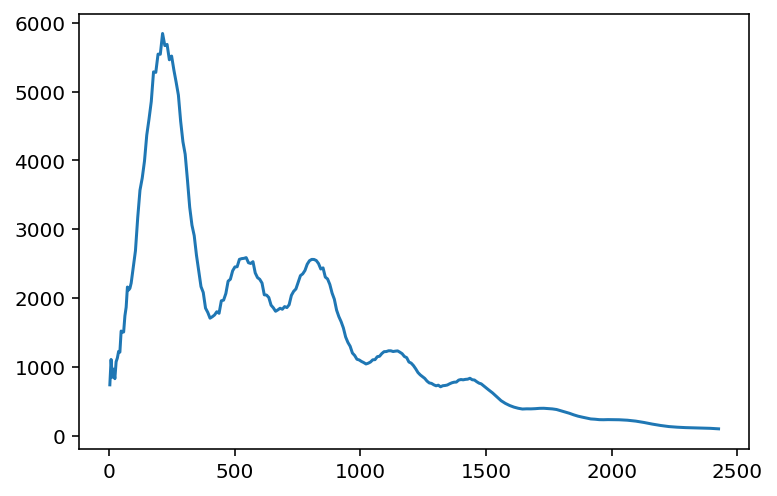

In [27]:
plt.plot(Lntotal, Clntotal)

In this step we need calculate the cosmic variance $\Delta C_l = \sqrt(2/(l+1))*$ of the binned l plus the $\sigma$ of binned of the $C_{ls}$. For this we binned the $\Delta C_l$ and to multiplate by clnn with the n=1,2,3,4,  where the clnn are the binned power spectrum.

In [28]:
def varianzacosmica(ln):
    return(np.sqrt(2/(ln+1)))

#varianzacosmica1=varianzacosmica(ln)
var1=varianzacosmica(ln1)
var2=varianzacosmica(ln2)
var3=varianzacosmica(ln3)
var4=varianzacosmica(ln4)
varr=np.concatenate([var1*cln1,var2*cln2,var3*cln3,var4*cln4]) #error bineado de la varianza cosmica

ERRORTOTALEN_Y=varr+Clntotaldisp

In [29]:
Clntotal=np.concatenate([cln1,cln2,cln3,cln4])

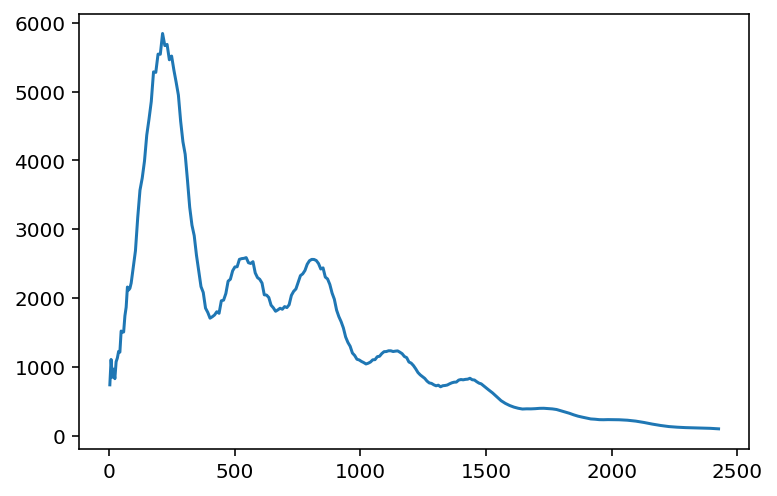

In [30]:
plt.plot(Lntotal,Clntotal,markersize = 0.5)

We compare the two plots with cosmic variance

In [243]:
#errors bars cosmic variance
yerr= ERRORTOTALEN_Y
plt.errorbar(Lntotal, Clntotal, yerr=yerr, xerr=None, fmt = 'go', markersize = 0.5, color = 'b', label = 'Cl obtained by a camb map')
plt.plot(ls, totCL, color = 'r', label ='lensed (Camb)')
plt.plot(ls, unlensedCL[:,0], color = 'y', label = 'Unlensed(camb)')
plt.xlim(0,1500)
plt.xlabel('$\ell$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend()

NameError: name 'ERRORTOTALEN_Y' is not defined

# In this part we are going to compare the power spectrum of the COM_CMB_IQU-smica_2048_R3.00_hm2 cmb map (https://pla.esac.esa.int/#maps) and the power spectrum obtained by $Planck_{2018}$

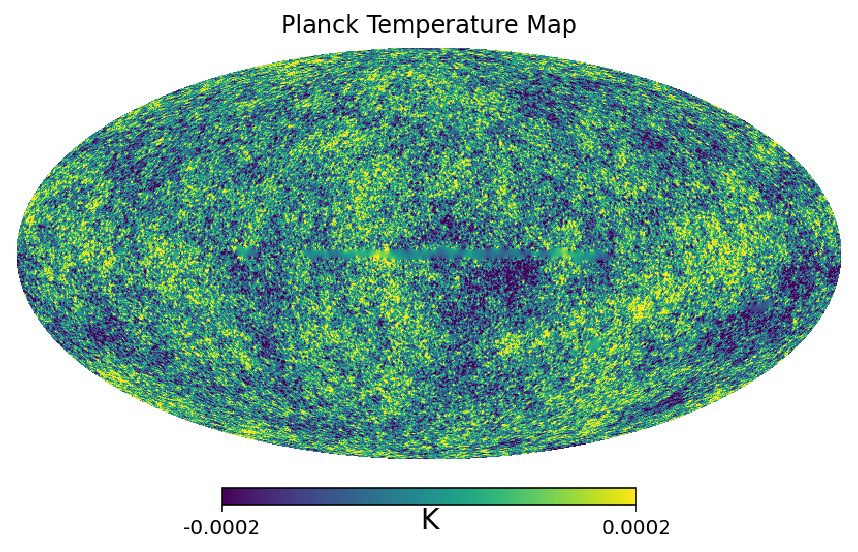

In [283]:
planck_IQU_SMICA=hp.read_map('/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
fig=plt.figure(1)
hp.mollview(planck_IQU_SMICA, min=-0.0002,max=0.0002,
title='Planck Temperature Map',fig=1,unit='K')

Computing the cls with anafast healpy routine

In [284]:
nside = 2048
lmax=2500
C_l = hp.anafast(planck_IQU_SMICA, lmax= lmax)
ll=np.arange(len(C_l))

In [285]:
print(C_l)
print(ll)

[2.86684113e-24 1.91443653e-23 2.12961569e-10 ... 3.99999545e-16
 3.93737487e-16 3.98453522e-16]
[   0    1    2 ... 2498 2499 2500]


In [82]:
Dl= C_l*ll*(ll+1)/2/np.pi*(1e6)**2
#plt.scatter(ll, C_l)

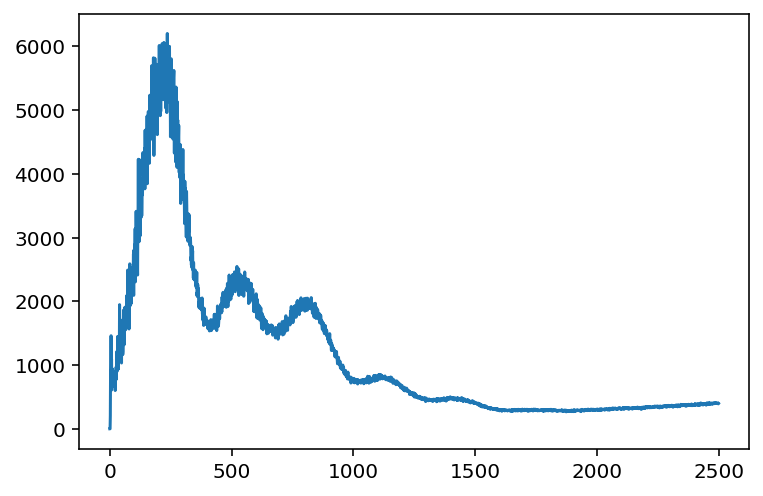

In [83]:
plt.plot(ll,Dl, markersize = 0.5)

Again we compute the PS of the map

In [84]:
Cll=hp.anafast(planck_IQU_SMICA, lmax = 2500)
ll=np.arange(len(Cll))

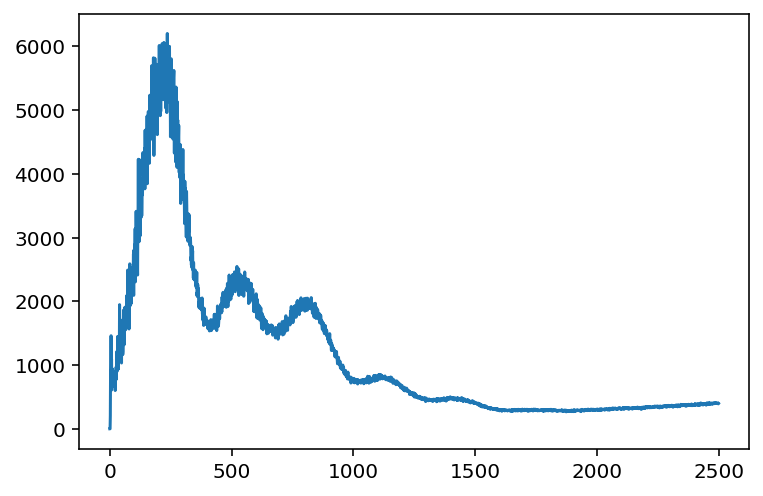

In [286]:
Dl=Cll*ll*(ll+1)/2/np.pi*(1e6)**2
plt.plot(ll, Dl, markersize = 0.5)

In [287]:
Dl.shape

(2501,)

In [298]:
Dl_0=np.zeros((len(Dl),4))
Dl_0[:,0]=Dl
Dl_0.shape

(2501, 4)

Reading the documentation of the Planck smica release we see that the output has a resolution of 5 minutes.Therefore as a first order correction of the beam, we can divide the power spectrum by the gauss beam window function. I compute the spherical transform of a aximmetric gaussian beam with hp.gauss_beam

In [86]:
Bl=hp.gauss_beam(fwhm = np.radians(5.0/60.0), lmax=lmax)
Cl_gauss = Cll*Bl
Dl_gauss = Dl/Bl

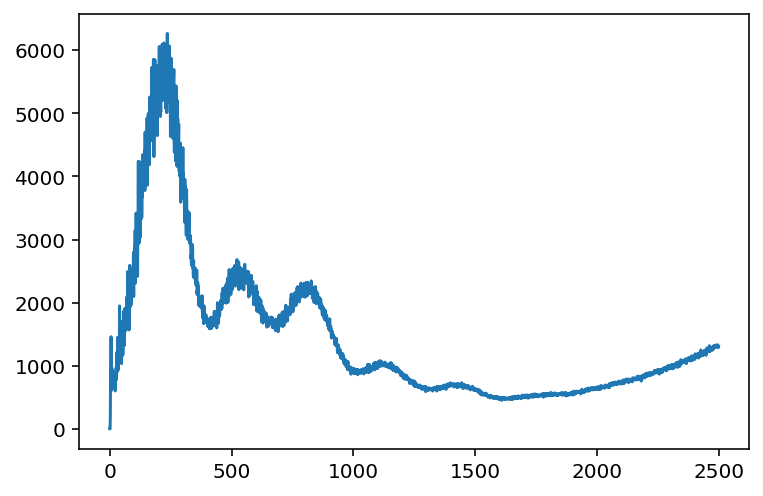

In [87]:
plt.plot(ll,Dl_gauss, markersize = 0.5)

I am going to binned the results following  Œîùëô=5  for  0 ‚â§ùëô ‚â§99  obtained of $Planck_{2018}$ results

In [43]:
# We define a function to bin the lls
# It depends of the lls, Dl, sums
def binsdata(ll,Dl_gauss, sums):
    # we define the bins like a ratio between len(y) and the sums
    bins=int(len(ll)/sums)
# Python counst from 0
# we made four arrays to equal to 0

    Dln=np.zeros(bins-1) 
    lln=np.zeros(bins-1)
    llndis=np.zeros(bins-1)
    Dlndis=np.zeros(bins-1)
# we define a function that returns the mean and desviantion standard of the ll and Dl   
    for i in range(bins-1):
        lln[i]=np.mean(ll[sums*i:sums*(i+1)]) # :from i to i=i+1
        Dln[i]=np.mean(Dl_gauss[sums*i:sums*(i+1)])
        llndis[i]=np.std(ll[sums*i:sums*(i+1)])
        Dlndis[i]=np.std(Dl_gauss[sums*i:sums*(i+1)])
    return(lln,Dln, llndis, Dlndis) 

I am going to binned the results following Œîùëô=5 for 0 ‚â§ùëô ‚â§99, Œîùëô=9 for 100 ‚â§ùëô ‚â§1500, Œîùëô=17 for 1500 ‚â§ùëô ‚â§2013, Œîùëô=33 for 2014 ‚â§ùëô ‚â§2500 obtained of $Planck_{2018}$ results

In [44]:
lln1,Dln1, llndis1, Dlndis1=binsdata(ll[0:99],Dl_gauss[0:99],5)


lln2,Dln2, llndis2, Dlndis2=binsdata(ll[100:1500],Dl_gauss[100:1500],9)
lln3,Dln3, llndis3, Dlndis3=binsdata(ll[1501:2013],Dl_gauss[1501:2013],17)
lln4,Dln4, llndis4, Dlndis4=binsdata(ll[2014:2500],Dl_gauss[2014:2500],33)
Lntotal=np.concatenate([lln1,lln2,lln3,lln4])
Dlntotal=np.concatenate([Dln1,Dln2,Dln3,Dln4])
llntotaldis=np.concatenate([llndis1, llndis2, llndis3, llndis4])
Dlntotaldisp= np.concatenate([Dlndis1, Dlndis2, Dlndis3, Dlndis4])

In [45]:
def varianzacosmica(lln):
    return(np.sqrt(2/(lln+1)))

#varianzacosmica1=varianzacosmica(ln)
var1=varianzacosmica(lln1)
var2=varianzacosmica(lln2)
var3=varianzacosmica(lln3)
var4=varianzacosmica(lln4)
varr=np.concatenate([var1*Dln1,var2*Dln2,var3*Dln3,var4*Dln4]) #error bineado de la varianza cosmica

Totalerror_y=varr+Dlntotaldisp

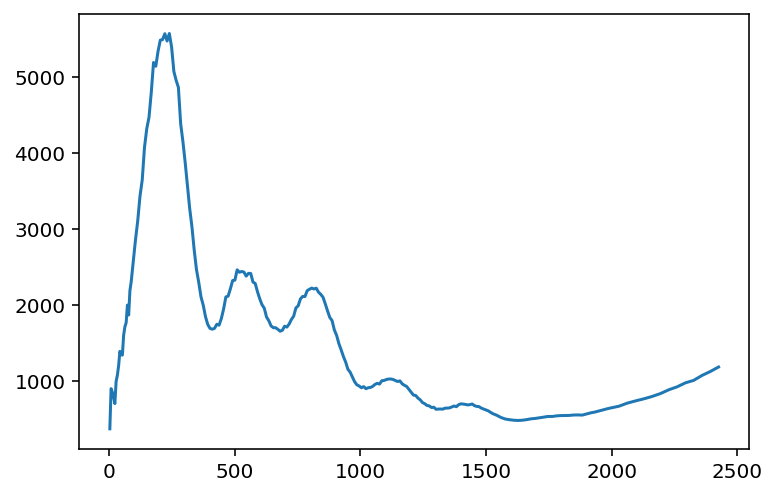

In [46]:
plt.plot(Lntotal, Dlntotal)

Finally we load the binned TT CMB power spectrum that will be our target:

In [47]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

--2022-08-02 12:30:04--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt
Resolviendo irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.110
Conectando con irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)[134.4.54.110]:443... conectado.
Petici√≥n HTTP enviada, esperando respuesta... 200 OK
Longitud: 7143 (7,0K) [text/plain]
Guardando como: ‚ÄúCOM_PowerSpect_CMB-TT-binned_R3.01.txt.1‚Äù

COM_PowerSpect_CMB- 100%[===================>]   6,98K  --.-KB/s    en 0s      

2022-08-02 12:30:06 (132 MB/s) - ‚ÄúCOM_PowerSpect_CMB-TT-binned_R3.01.txt.1‚Äù guardado [7143/7143]



In [49]:
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

We compare the two plots with cosmic variance

/tmp/ipykernel_9130/99703341.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.errorbar(Lntotal, Clntotal, yerr=ERRORTOTALEN_Y, xerr=None, fmt = 'go', markersize = 0.5, color = 'g', label = 'Cl obtained by a camb map')
/tmp/ipykernel_9130/99703341.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.errorbar(Lntotal, Dlntotal, yerr=Totalerror_y, xerr=None, fmt = 'go', markersize = 0.5, linewidth=2.0, color = 'b', alpha = 1.0, label = 'Planck 2018 PS from smica map')


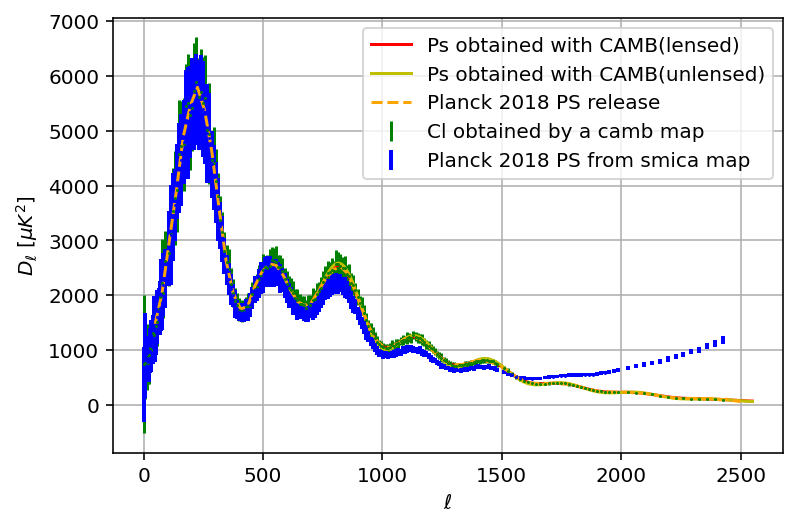

In [50]:
#errors bars cosmic variance
yerr=Totalerror_y
yerr=ERRORTOTALEN_Y
plt.errorbar(Lntotal, Clntotal, yerr=ERRORTOTALEN_Y, xerr=None, fmt = 'go', markersize = 0.5, color = 'g', label = 'Cl obtained by a camb map')
plt.plot(ls, totCL[:,0], color = 'r', label ='Ps obtained with CAMB(lensed)')
plt.plot(ls, unlensedCL[:,0], color = 'y', label = 'Ps obtained with CAMB(unlensed)')
plt.errorbar(Lntotal, Dlntotal, yerr=Totalerror_y, xerr=None, fmt = 'go', markersize = 0.5, linewidth=2.0, color = 'b', alpha = 1.0, label = 'Planck 2018 PS from smica map')
plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--',color = 'orange', alpha=1, label='Planck 2018 PS release')
#plt.xlim(0,200)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')

# In this step we are going to calculate the pseudo $Cls$ estimator using namastar routine

 import pymaster

In [88]:
import pymaster as nmt

Healpix parameter used here

In [89]:
nside = 2048

We read the mask 

COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits -- Temperature confidence mask with fsky = 77.9%. 

In [90]:
mask=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

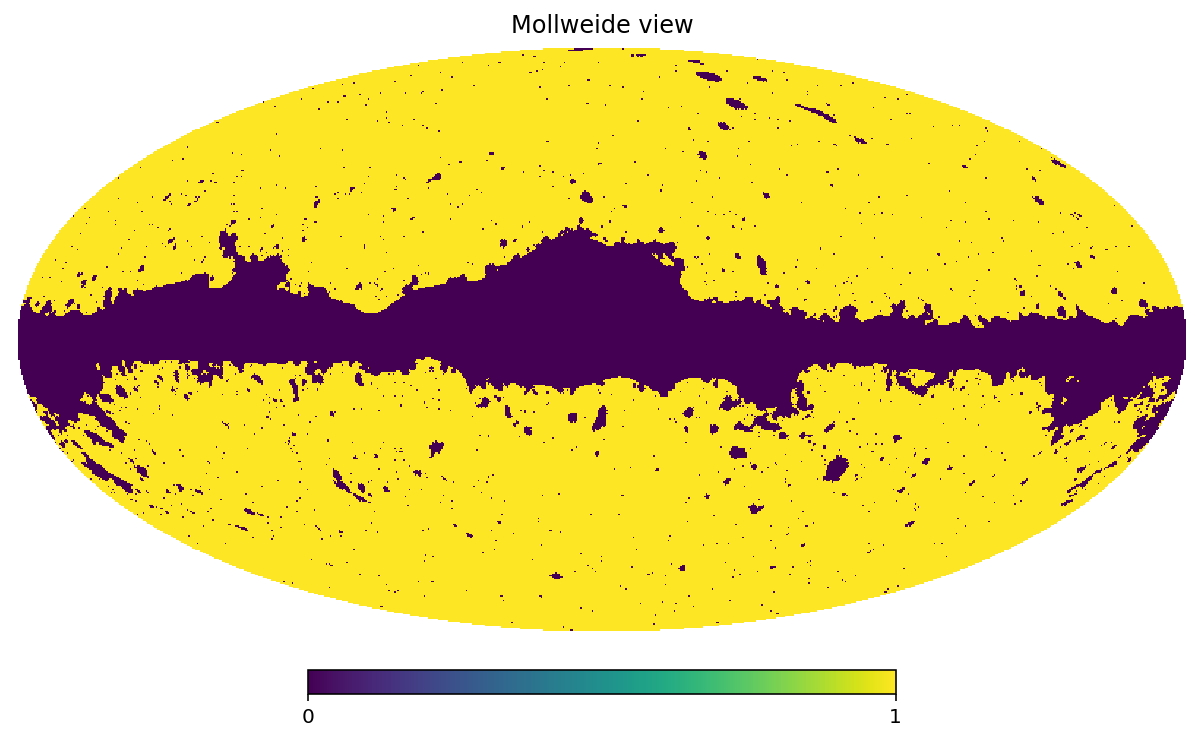

In [91]:
hp.mollview(mask)
plt.show()

Read healpix maps and initialize a spin-0

In [55]:
?nmt.NmtField

Here we are going to describing the information to correlateincluding their observed maps, masks and contaminant templates with smoothed map.

In [92]:
#f_0 = nmt.NmtField(mask, [hp.read_map('/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits', field=0)])
f_0=nmt.NmtField(mask, [planck_IQU_SMICA])


In [93]:
?nmt.NmtBin.from_nside_linear

In [94]:
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [59]:
#B_l=hp.gauss_beam(fwhm = np.radians(5.0/60.0), lmax=2500)

In [163]:
cl_00 = nmt.compute_full_master(f_0, f_0, b)
ell_arr = b.get_effective_ells()
ell_arr


array([3.5000e+00, 7.5000e+00, 1.1500e+01, ..., 6.1315e+03, 6.1355e+03,
       6.1395e+03])

In [246]:
ell_arr

array([3.5000e+00, 7.5000e+00, 1.1500e+01, ..., 6.1315e+03, 6.1355e+03,
       6.1395e+03])

In [167]:
cl_00

array([[2.17561436e-10, 7.35844194e-11, 3.20879069e-11, ...,
        1.28760109e-18, 1.37457963e-18, 1.56123462e-18]])

(0.0, 1000.0)

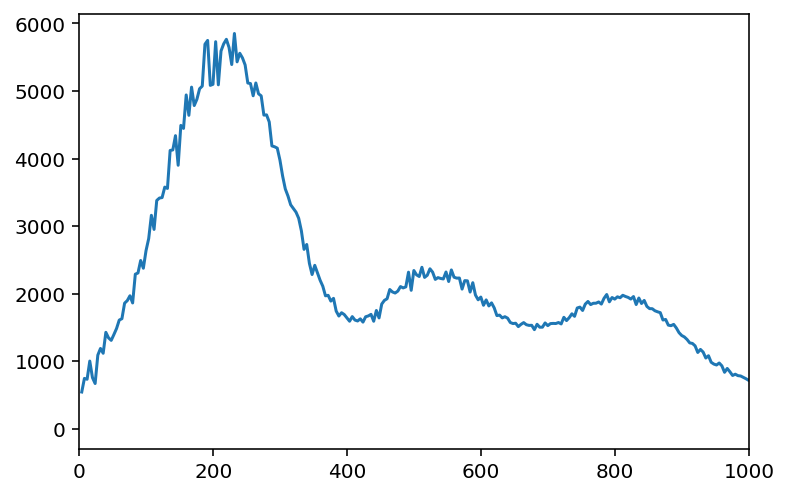

In [174]:
plt.plot(ell_arr, cl_00[0]*(1e6)**2*ell_arr*(ell_arr+1)/2/np.pi)
plt.xlim(0,1000)

We need interpolate the pseudocls

In [175]:
from scipy.interpolate import interp1d

In [324]:
ell_arr.shape

(1535,)

In [323]:
pDl=cl_00[0]*(1e6)**2*ell_arr*(ell_arr+1)/2/np.pi

In [325]:
f=interp1d(ell_arr, pDl, kind='cubic') #Idefine the interpolation

In [326]:
xnew=np.linspace(4, 1539, 1535)
#pdl is the interpolated new function 
pdl=f(xnew)


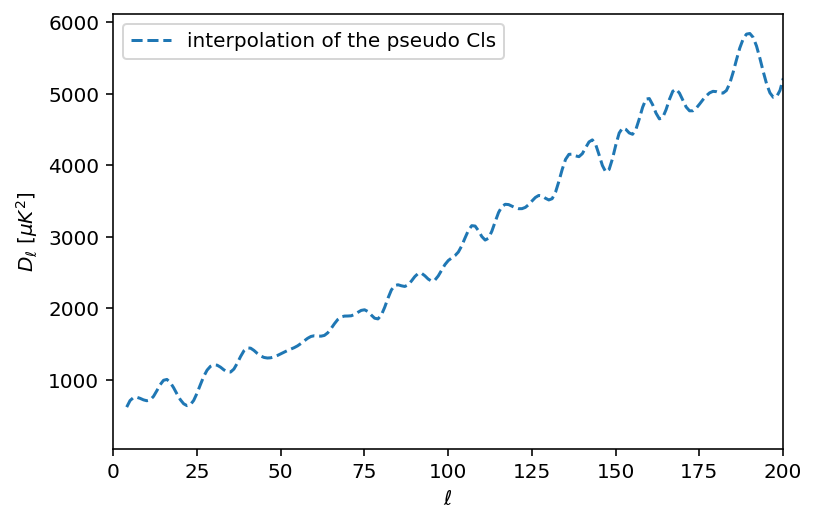

In [327]:
#plt.plot(ell_arr,pDl, 'o', label='pseudoDl')
#plt.plot(ls, totCL[:,0], color = 'r', label ='Ps obtained with CAMB(lensed)')
plt.plot(xnew, f(xnew), '--', label= 'interpolation of the pseudo Cls')
plt.xlim(0,200)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.savefig('interpolation.png')
plt.legend(loc='best')

In [328]:
pdl.shape
#pDl.shape

(1535,)

I make a new array to input in camb.correlations

In [339]:
pdl_ = np.ones((len(pdl),4))
pdl_[:,0] = pdl

In [330]:
pdl_.shape

(1535, 4)

In [331]:
pdl_[0]

array([545.35915247,   1.        ,   1.        ,   1.        ])

In [133]:
B_l=hp.gauss_beam(fwhm=np.radians(10.0/60.0), lmax=len(ell_arr)-1)

In [340]:
c_theta_1=camb.correlations.cl2corr(Dl_0,x, lmax=1500)
pdl_theta=camb.correlations.cl2corr(pdl_, x, lmax=1500)
c_theta_2=camb.correlations.cl2corr(totCL,x, lmax=1500)

/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb/correlations.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  fac = fac1 / fac2
/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb/correlations.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  d22 = (((4 * x - 8) / fac2 + lfacs) * P
/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb/correlations.py:89: RuntimeWarning: invalid value encountered in add
  d22 = (((4 * x - 8) / fac2 + lfacs) * P


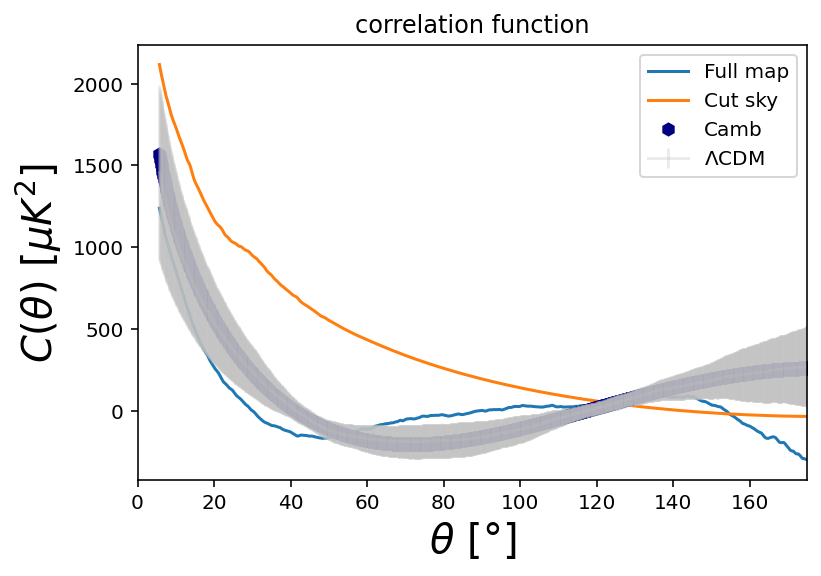

In [341]:
plt.plot(theta*180/np.pi, c_theta_1[:,0], label='Full map')
plt.plot(theta*180/np.pi, pdl_theta[:,0], label='Cut sky')
plt.plot(theta*180/np.pi, c_theta_2[:,0],'h',color='navy', label='Camb')
plt.errorbar(theta*180/np.pi,media, yerr=sigma,alpha=0.3, color='silver', label='$\Lambda$CDM')

plt.xlim(0,175)
plt.xlabel(r'$\theta~[¬∞]$',fontsize=20)
plt.ylabel(r'$C(\theta)~[\mu K^2]$',fontsize=20)
plt.title('correlation function')
plt.legend()
plt.show()

In [104]:
pDl = np.ones((len(pDl_00),4))
pDl

array([[1., 1., 1., 1.]])

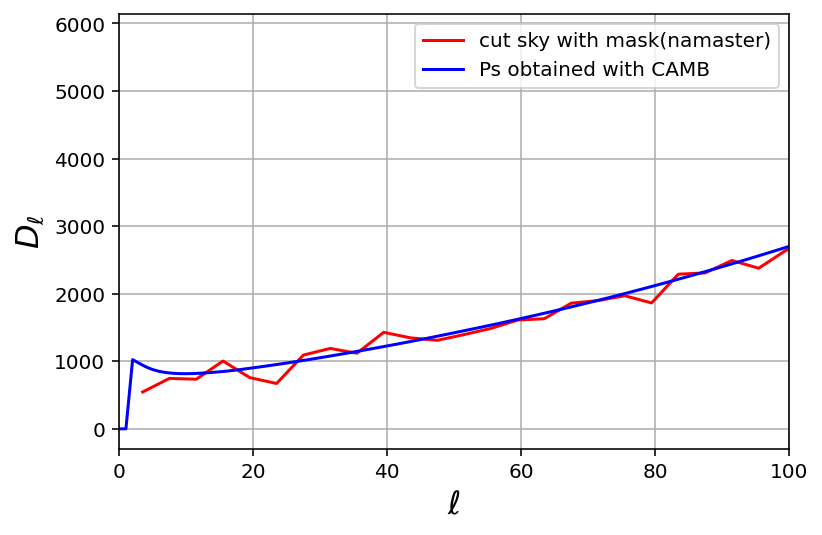

In [344]:
pDl_00=cl_00*(1e6)**2*ell_arr*(ell_arr+1)/2/np.pi/B_l**2

plt.plot(ell_arr, pDl, 'r-', label='cut sky with mask(namaster)')
plt.plot(ls, totCL[:,0], color = 'b', label ='Ps obtained with CAMB')
plt.xlim(0,100)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell$', fontsize=16)
plt.grid()
plt.legend()
plt.show()

We are going to download another mask

In [271]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/masks/COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits

--2022-07-13 11:52:03--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/masks/COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits
Resolviendo irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.110
Conectando con irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)[134.4.54.110]:443... conectado.
Petici√≥n HTTP enviada, esperando respuesta... 200 OK
Longitud: 201335040 (192M) [image/x-fits]
Guardando como: ‚ÄúCOM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits‚Äù

COM_Mask_CMB-Inpain 100%[===================>] 192,01M  12,6MB/s    en 24s     

2022-07-13 11:52:29 (7,87 MB/s) - ‚ÄúCOM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits‚Äù guardado [201335040/201335040]



I read the mask

COM_Mask_CMB-HM-Misspix-Mask-Int_2048_R3.00.fits -- Temperature half-mission missing pixels mask with fsky = 96.0%. 

In [62]:
mask2=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-HM-Misspix-Mask-Int_2048_R3.00.fits')

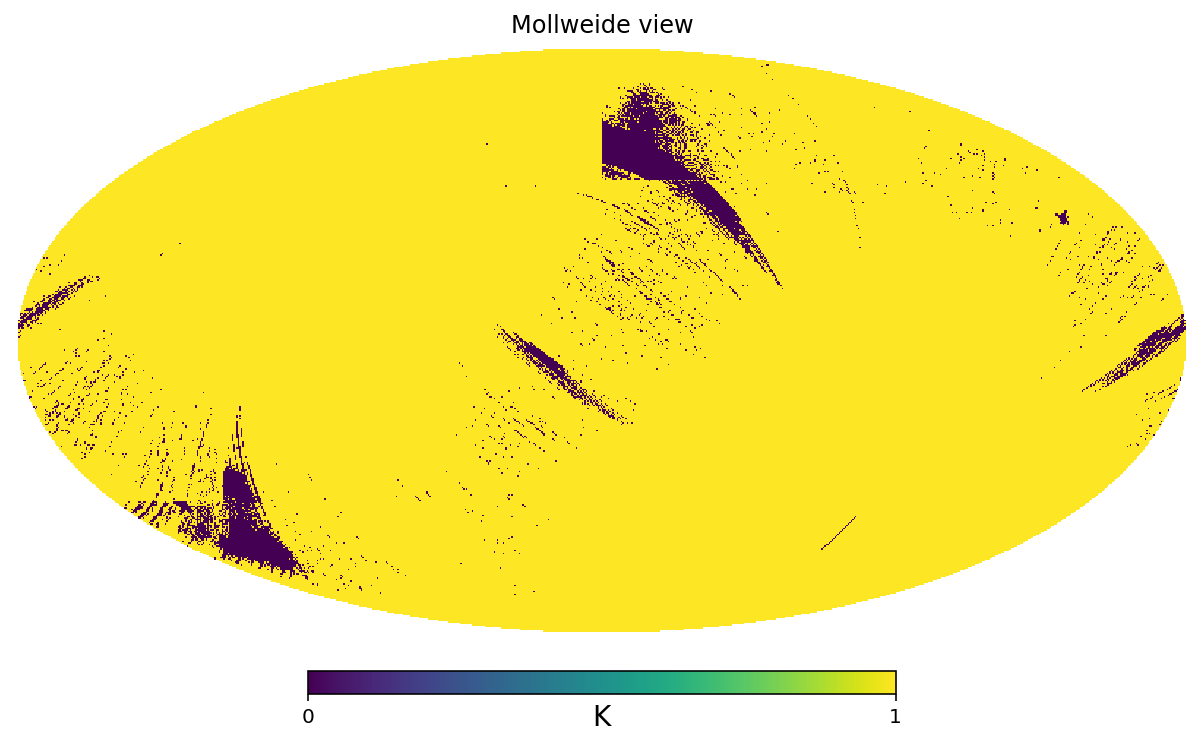

In [63]:
hp.mollview(mask2, unit= 'K')

Here we are going to describing the information to correlateincluding their observed maps, masks and contaminant templates with smoothed map.

In [64]:
f2_0=nmt.NmtField(mask2, [planck_IQU_SMICA ])

In [65]:
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [66]:
cl2_00 = nmt.compute_full_master(f2_0, f2_0, b)
ell2_arr = b.get_effective_ells()
B_l2=hp.gauss_beam(fwhm=np.radians(5.0/60.0), lmax=len(ell2_arr)-1)

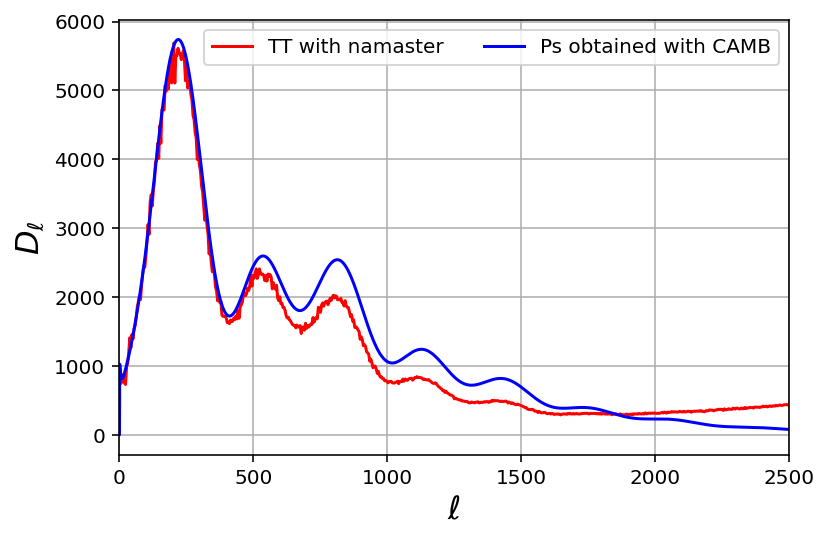

In [67]:
p2Dl_00=cl2_00*(1e6)**2*ell_arr*(ell_arr+1)/2/np.pi

plt.plot(ell2_arr, p2Dl_00[0]/(B_l2**2), 'r-', label='TT with namaster')
plt.plot(ls, totCL[:,0], color = 'b', label ='Ps obtained with CAMB')
plt.xlim(0,2500)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell$', fontsize=16)
plt.grid()
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

masked array number 3

I read the mask

COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits -- Temperature CMB in-painting mask with fsky = 97.9%.

In [68]:
mask3=hp.read_map('/home/augusto/cmblss/code/cmblss-main/COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits')

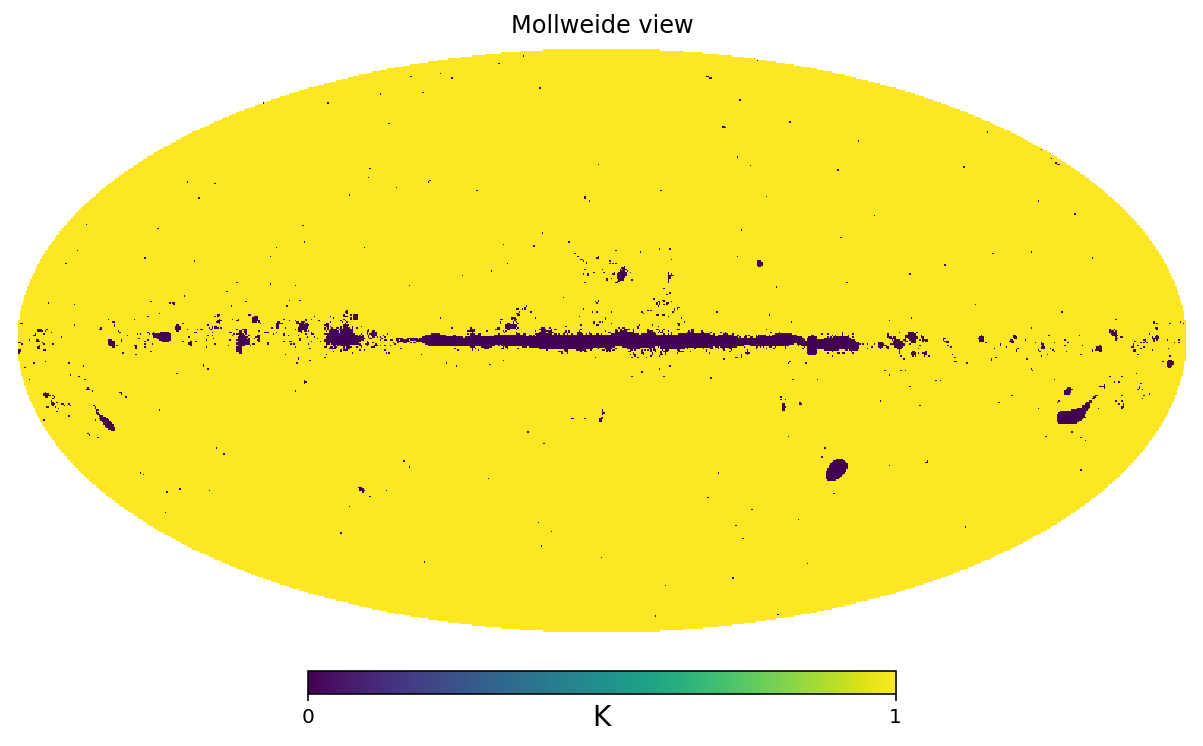

In [69]:
hp.mollview(mask3, unit = 'K')

Here we are going to describing the information to correlateincluding their observed maps, masks and contaminant templates with smoothed map.

In [70]:
f3_0=nmt.NmtField(mask3, [planck_IQU_SMICA ])

Initialize binning scheme with 4 ells per bandpower

In [71]:
b3 = nmt.NmtBin.from_nside_linear(nside, 4)

I compute the $ pseudo  c_{ls} $ and  I compute the pseudo spherical transform of an axisimmetric gaussian beam

In [72]:
cl3_00 = nmt.compute_full_master(f3_0, f3_0, b3)
ell3_arr = b3.get_effective_ells()
B_l3=hp.gauss_beam(fwhm=np.radians(5.0/60.0), lmax=len(ell3_arr)-1)
cl3_00

array([[2.96839170e-10, 7.87630827e-11, 3.81718416e-11, ...,
        2.38355613e-18, 2.41377224e-18, 2.48509092e-18]])

In [73]:
print(cl3_00.shape)
cl3_00[0]
print(cl3_00[0].shape)

(1, 1535)
(1535,)


Plot the results

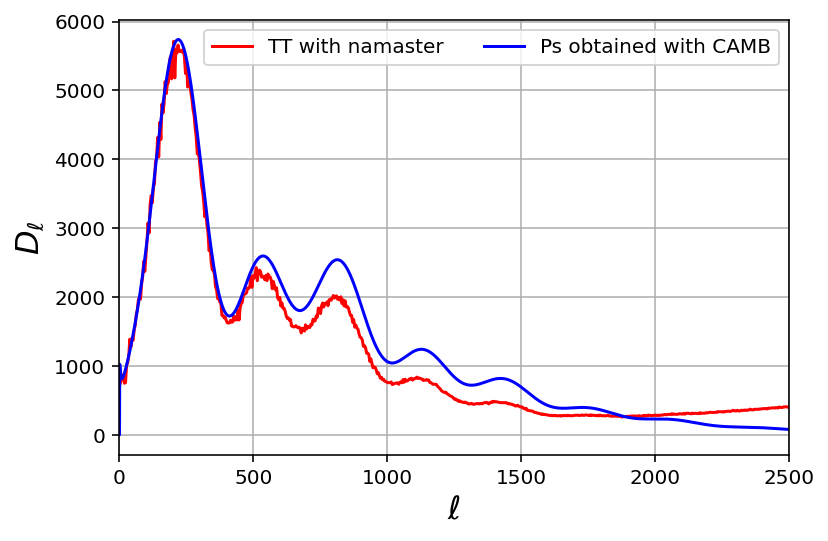

In [74]:
p3Dl_00=cl3_00*(1e6)**2*ell3_arr*(ell3_arr+1)/2/np.pi
plt.plot(ell3_arr, p3Dl_00[0]/B_l3**2, 'r-', label='TT with namaster')
plt.plot(ls, totCL[:,0], color = 'b', label ='Ps obtained with CAMB')
plt.xlim(0,2500)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell$', fontsize=16)
plt.grid()
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

Here we compare the power spectrum of the cmb map with the pseudo cls of cm COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits

/tmp/ipykernel_9130/1351322135.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(ls, totCL[:,0],'g', color = 'b', label ='Ps obtained with CAMB(lensed)')


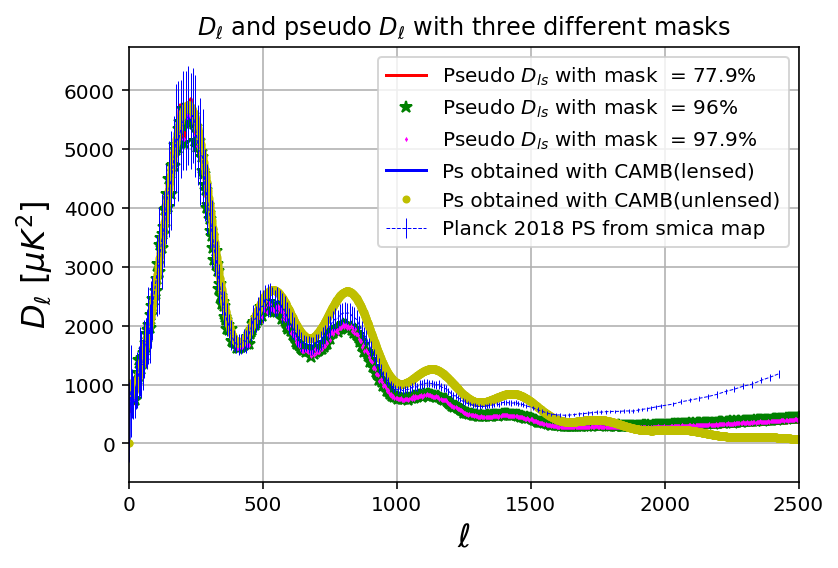

In [75]:
ell_arr = b.get_effective_ells()
pDl_00=cl_00*(1e6)**2*ell_arr*(ell_arr+1)/2/np.pi
# I plots and compare all powers spectrum
plt.plot(ell_arr, pDl_00[0]/B_l**2, 'r-', label='Pseudo $D_{ls}$ with mask  = 77.9%')
plt.plot(ell2_arr, p2Dl_00[0]/(B_l2**2), '*',color = 'green', label='Pseudo $D_{ls}$ with mask  = 96%')
plt.plot(ell3_arr, p3Dl_00[0]/B_l3**2, 'd',markersize = 0.5, linewidth=0.5, color= 'fuchsia',label='Pseudo $D_{ls}$ with mask  = 97.9%')
plt.plot(ls, totCL[:,0],'g', color = 'b', label ='Ps obtained with CAMB(lensed)')
plt.plot(ls, unlensedCL[:,0], '.', color = 'y', label = 'Ps obtained with CAMB(unlensed)')
plt.errorbar(Lntotal, Dlntotal, yerr=Totalerror_y, xerr=None, fmt = '--', markersize = 0.5, linewidth=0.5, color = 'b', alpha = 1.0, label = 'Planck 2018 PS from smica map')
plt.xlim(0,2500)
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)
plt.title('$D_\\ell$ and pseudo $D_\\ell$ with three different masks')
plt.grid()
plt.legend()
plt.show()

# In this section I will calculate the temperature two points angular correlation function

Only in the case of the gaussian random, statistically isotropic temperature fluctuations will it contain the all statistic information. The full sky two points angular correlation function is relacionated to full sky power spectrum via a Legendre series:
                       $C(\theta) = \sum_{\\l}[(2l +1)/4\pi]*P_{l}(cos\theta)$

Even with the existence of cleaned, full-sky maps the concern of residual contamination, particularly on the largest angular scales, remains. For this reason it is desirable to remove the most contaminated regions of the sky and only analyse the cleanest ones.


Unfortunately the full-sky cannot be observed due to foreground contamination. So we need to put a mask. Then  cut-sky quantities can be defined in analogy to the
full-sky ones from above. In particular, the cut-sky two-point angular correlation function is defined as the sky average,
$C^{cut}(\theta)=\sum_l[(2l +1)/4\pi]*[C^{cut}_l]*P_{l}(cos\theta)$.
Where we are going to take $pseudoC_l$ indeed $C^{cut}_l$. The first one are obtained by namaster library python.


I reduce the resolution of the map to obtain computation time because when generating statistics from realizations of ŒõCDM, a low resolution is preferred. $Nside=128$

To work at low resolution we use the healpy ud.grade by overaging over pixels. I also only generated including modes up to $lmax = 100$. It has been verified that neither degrading from higher resolutions real-izations nor increasing `max affects the final results. 

In [76]:
# I degrade the map and the  three mask
planck_IQU_SMICA_degraded=hp.pixelfunc.ud_grade(planck_IQU_SMICA, nside_out=128)
# Masks
mask_degraded=hp.pixelfunc.ud_grade(mask, nside_out=128) # $fsky = 77%$
mask2_degraded=hp.pixelfunc.ud_grade(mask2, nside_out=128) # $fsky = 96%$
mask3_degraded=hp.pixelfunc.ud_grade(mask3, nside_out=128) # $fsky = 97.9%$

I compute the $ pseudoC_l$ and $l$ for the  three masks

In [77]:
f_01=nmt.NmtField(mask_degraded, [planck_IQU_SMICA_degraded])
f_02=nmt.NmtField(mask2_degraded, [planck_IQU_SMICA_degraded])
f_03=nmt.NmtField(mask3_degraded, [planck_IQU_SMICA_degraded])


Initialize binning scheme with 4 ells per bandpower 

In [78]:
# Healpix map resolution
nside=128
# Initialize binning scheme with bandpowers of constant width
# (4 multipoles per bin)
bin1 = nmt.NmtBin.from_nside_linear(nside, 4)
bin2 = nmt.NmtBin.from_nside_linear(nside, 4)
bin3 = nmt.NmtBin.from_nside_linear(nside, 4)

In [450]:
cl1 = nmt.compute_full_master(f_01, f_01, bin1)
l1 = bin1.get_effective_ells()
print(cl1.shape)
print(l1.shape)
B_l=hp.gauss_beam(fwhm=np.radians(5.0/60.0), lmax=len(l1)-1)
cl1_gauss=cl1/B_l


(1, 95)
(95,)


In [409]:
l1

array([  3.5,   7.5,  11.5,  15.5,  19.5,  23.5,  27.5,  31.5,  35.5,
        39.5,  43.5,  47.5,  51.5,  55.5,  59.5,  63.5,  67.5,  71.5,
        75.5,  79.5,  83.5,  87.5,  91.5,  95.5,  99.5, 103.5, 107.5,
       111.5, 115.5, 119.5, 123.5, 127.5, 131.5, 135.5, 139.5, 143.5,
       147.5, 151.5, 155.5, 159.5, 163.5, 167.5, 171.5, 175.5, 179.5,
       183.5, 187.5, 191.5, 195.5, 199.5, 203.5, 207.5, 211.5, 215.5,
       219.5, 223.5, 227.5, 231.5, 235.5, 239.5, 243.5, 247.5, 251.5,
       255.5, 259.5, 263.5, 267.5, 271.5, 275.5, 279.5, 283.5, 287.5,
       291.5, 295.5, 299.5, 303.5, 307.5, 311.5, 315.5, 319.5, 323.5,
       327.5, 331.5, 335.5, 339.5, 343.5, 347.5, 351.5, 355.5, 359.5,
       363.5, 367.5, 371.5, 375.5, 379.5])

In [343]:
cl2 = nmt.compute_full_master(f_02, f_02, bin2)[0]
l2 = bin2.get_effective_ells()
print(cl2.shape)
print(l2.shape)

(95,)
(95,)


In [347]:
cl3 = nmt.compute_full_master(f_03, f_03, bin3)[0]
l3 = bin3.get_effective_ells()
print(cl3.shape)
print(l3.shape)


(95,)
(95,)


Finally I am going to calculate the temperature two point correlation fuction

Step previous and auxiliary calculations

Import libraries

In [232]:
import scipy

In [451]:
theta=np.linspace(0,np.pi,95)
x = np.cos(theta)
suma=0
C_theta=0

# Return the Legendre coefficients
from scipy.special import legendre
for l in range(len(cl1_gauss)):
    Pl_theta=legendre(l)
    suma= suma +(2*l+1)*cl1_gauss[l]*Pl_theta

C_theta=suma/4/np.pi


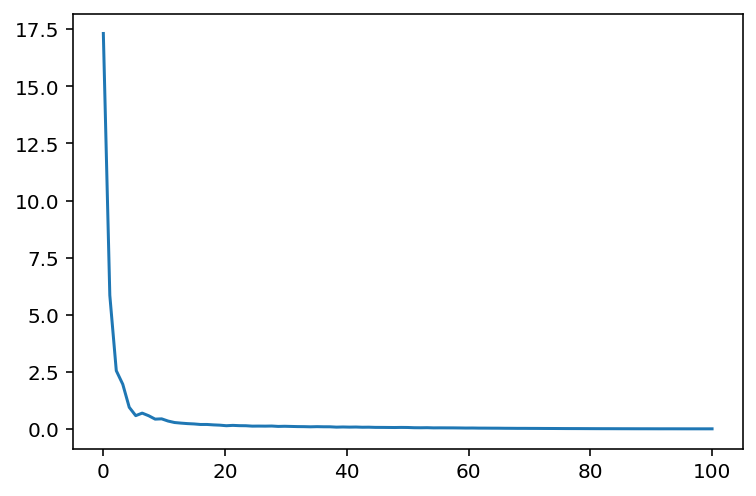

In [453]:
plt.plot(theta*100/np.pi, C_theta*(1e12)/B_l)

In [402]:
from camb import correlations

In [464]:
Cls=cl1[0]*l*(l+1)/2/np.pi
theta=np.linspace(0,np.pi,100)
print(Cls.shape)
print("Shape of the array = ",np.shape(Cls))

(95,)
Shape of the array =  (95,)


In [463]:
xvals=np.arange(1,-1)
print("Array Dimension = ",len(xvals.shape))

Array Dimension =  1


In [465]:
C_theta=camb.correlations.cl2corr(p3Dl_00[0],xvals=np.arange(1,-1), lmax=100)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [364]:
conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.


In [308]:
cl1

array([[2.17606362e-10, 7.35331740e-11, 3.20476906e-11, 2.45852133e-11,
        1.19041010e-11, 7.30672326e-12, 8.70045280e-12, 7.26392838e-12,
        5.39192726e-12, 5.55327934e-12, 4.33065251e-12, 3.52645065e-12,
        3.19590056e-12, 2.92476500e-12, 2.74807349e-12, 2.44742038e-12,
        2.45809028e-12, 2.22945347e-12, 2.07131757e-12, 1.76498542e-12,
        1.95290519e-12, 1.79568166e-12, 1.75955496e-12, 1.53852280e-12,
        1.56901722e-12, 1.53647801e-12, 1.59567131e-12, 1.38311475e-12,
        1.45983118e-12, 1.37102023e-12, 1.28320384e-12, 1.25184388e-12,
        1.16614613e-12, 1.25477697e-12, 1.18633880e-12, 1.17382602e-12,
        9.85778731e-13, 1.07362959e-12, 9.95032410e-13, 1.04764519e-12,
        9.27522512e-13, 9.58721056e-13, 8.49100137e-13, 8.37072791e-13,
        8.06334273e-13, 7.77611363e-13, 8.30047662e-13, 7.93591397e-13,
        6.67589999e-13, 6.40150867e-13, 6.86929937e-13, 5.80706159e-13,
        6.03267935e-13, 5.83811491e-13, 5.72628756e-13, 5.361701

In [321]:
l3

array([  3.5,   7.5,  11.5,  15.5,  19.5,  23.5,  27.5,  31.5,  35.5,
        39.5,  43.5,  47.5,  51.5,  55.5,  59.5,  63.5,  67.5,  71.5,
        75.5,  79.5,  83.5,  87.5,  91.5,  95.5,  99.5, 103.5, 107.5,
       111.5, 115.5, 119.5, 123.5, 127.5, 131.5, 135.5, 139.5, 143.5,
       147.5, 151.5, 155.5, 159.5, 163.5, 167.5, 171.5, 175.5, 179.5,
       183.5, 187.5, 191.5, 195.5, 199.5, 203.5, 207.5, 211.5, 215.5,
       219.5, 223.5, 227.5, 231.5, 235.5, 239.5, 243.5, 247.5, 251.5,
       255.5, 259.5, 263.5, 267.5, 271.5, 275.5, 279.5, 283.5, 287.5,
       291.5, 295.5, 299.5, 303.5, 307.5, 311.5, 315.5, 319.5, 323.5,
       327.5, 331.5, 335.5, 339.5, 343.5, 347.5, 351.5, 355.5, 359.5,
       363.5, 367.5, 371.5, 375.5, 379.5])

In [351]:
# We create the legendre polynomial array
theta=np.linspace(0,np.pi,100)
x = np.cos(theta)
pol=[] #define an voids array
for l in range(len(cl1)):
    coef = scipy.special.legendre(l)
    pol.append(coef(x))
pol=np.array(pol)
#suming
L=np.arange(0,len(cl1),1)
sumandos=1./(4.*np.pi)*(2*L[:,None]+1)*cl1[:,None]*(1e6)**2*pol
resultado = np.sum(sumandos,axis=0)

theta=np.linspace(0,np.pi,100)
x = np.cos(theta)
pol=[] #define an voids array
for l in range(len(cl2)):
    coef = scipy.special.legendre(l)
    pol.append(coef(x))
pol=np.array(pol)
#suming
L=np.arange(0,len(cl2),1)
sumandos2=1./(4.*np.pi)*(2*L[:,None]+1)*cl2[:,None]*(1e6)**2*pol
resultado2 = np.sum(sumandos2,axis=0)

theta=np.linspace(0,np.pi,100)
x = np.cos(theta)
pol=[] #define an voids array
for l in range(len(cl3)):
    coef = scipy.special.legendre(l)
    pol.append(coef(x))
pol=np.array(pol)
#suming
L=np.arange(0,len(cl3),1)
sumandos3=1./(4.*np.pi)*(2*L[:,None]+1)*cl3[:,None]**(1e6)**2*pol
resultado3 = np.sum(sumandos,axis=0)

/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/scipy/special/_orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


In [327]:
cl1

array([2.17606362e-10, 7.35331740e-11, 3.20476906e-11, 2.45852133e-11,
       1.19041010e-11, 7.30672326e-12, 8.70045280e-12, 7.26392838e-12,
       5.39192726e-12, 5.55327934e-12, 4.33065251e-12, 3.52645065e-12,
       3.19590056e-12, 2.92476500e-12, 2.74807349e-12, 2.44742038e-12,
       2.45809028e-12, 2.22945347e-12, 2.07131757e-12, 1.76498542e-12,
       1.95290519e-12, 1.79568166e-12, 1.75955496e-12, 1.53852280e-12,
       1.56901722e-12, 1.53647801e-12, 1.59567131e-12, 1.38311475e-12,
       1.45983118e-12, 1.37102023e-12, 1.28320384e-12, 1.25184388e-12,
       1.16614613e-12, 1.25477697e-12, 1.18633880e-12, 1.17382602e-12,
       9.85778731e-13, 1.07362959e-12, 9.95032410e-13, 1.04764519e-12,
       9.27522512e-13, 9.58721056e-13, 8.49100137e-13, 8.37072791e-13,
       8.06334273e-13, 7.77611363e-13, 8.30047662e-13, 7.93591397e-13,
       6.67589999e-13, 6.40150867e-13, 6.86929937e-13, 5.80706159e-13,
       6.03267935e-13, 5.83811491e-13, 5.72628756e-13, 5.36170133e-13,
      

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(theta*180/np.pi,resultado,'*', color= 'b', label='COM_Mask_CMB-common-Mask-Int_2048_R3.00' )
plt.plot(theta*180/np.pi,resultado2, 'r-', color ='r', label='COM_Mask_CMB-HM-Misspix-Mask-Int_2048_R3.00')
plt.plot(theta*180/np.pi,resultado3, 'g', color ='y',label='COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.')
plt.xlim(0,180)
plt.xlabel(r"$\theta(degree)$")
plt.ylabel(r"$C_{cut}(\theta)~[\mu K^2]$")
plt.legend()


I am going to make the same but without $Nside=48$

In [362]:
theta=np.linspace(0,np.pi,1535)
x = np.cos(theta)
pol=[] #define an voids array
for l in range(len(cl3_00[0])):
    coef = scipy.special.legendre(l)
    pol.append(coef(x))
pol=np.array(pol)
#suming
L=np.arange(0,len(cl3_00),1)
sumandos=1./(4.*np.pi)*(2*L[:,None]+1)*cl3_00[:,None]*(1e6)**2*pol
resultado = np.sum(sumandos,axis=0)

/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/scipy/special/_orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/scipy/special/_orthogonal.py:2444: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/scipy/special/_orthogonal.py:2444: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n


OverflowError: (34, 'Numerical result out of range')